<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/tanisha/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a shared drive to mount data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


#**Team 19:**


##*Scenario:*
We are a data consulting firm that has been hired by the worst performing constructor to help them hire a new team of drivers and improve their performance standings

##*Hypothesis:*
By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance and recommend specific strategies for the worst-performing team to improve their race results.

Factors such as pit stop, qaulify times, grid position

##*Initial Data Exploration:*

- Heatmap to show correlation

- Aggregating pit stop times

- Ranking of Teams with quickest pit stops

- Ranking of Teams lowest grid position






# **Import libraries**

In [3]:
pip install fastf1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

# Read in Data

**Read in data**

In [5]:
driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
constructor_results = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_results.csv')
constructor_standings = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_standings.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')
pit_stops = pd.read_csv('/content/forumla1-mini-sprint/data/pit_stops.csv')
qualifying = pd.read_csv('/content/forumla1-mini-sprint/data/qualifying.csv')


# Explore Data

Checking the info of each included data, # of columns, # of rows

In [6]:
driver_standings.info()
driver_standings.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,0,1,2,3,4
driverStandingsId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0
position,1,2,3,4,5
positionText,1,2,3,4,5
wins,1,0,0,0,0


In [7]:
driver_standings.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


from matplotlib import pyplot as plt
_df_0['driverStandingsId'].plot(kind='hist', bins=20, title='driverStandingsId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['raceId'].plot(kind='hist', bins=20, title='raceId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['driverId'].plot(kind='hist', bins=20, title='driverId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='driverStandingsId', y='raceId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='raceId', y='driverId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='driverId', y='points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='points', y='position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['driverStandingsId'].plot(kind='line', figsize=(8, 4), title='driverStandingsId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['raceId'].plot(kind='line', figsize=(8, 4), title='raceId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['driverId'].plot(kind='line', figsize=(8, 4), title='driverId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['points'].plot(kind='line', figsize=(8, 4), title='points')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
drivers.info()
drivers.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [17]:
results.info()
results.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

,0,1,2,3,4
resultId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
constructorId,1,2,3,4,1
number,22,3,7,5,23
grid,1,5,7,11,3
position,1,2,3,4,5
positionText,1,2,3,4,5
positionOrder,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0


In [16]:
results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


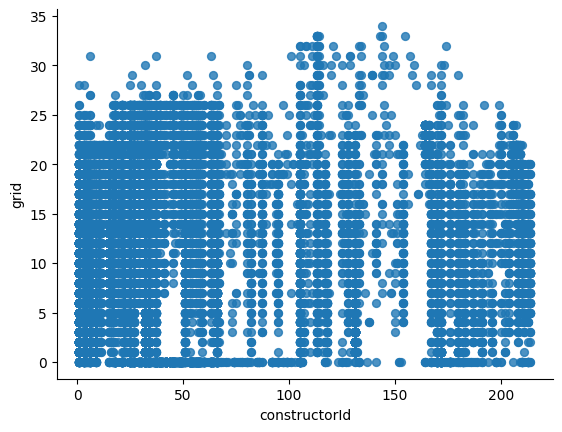

In [15]:
# @title constructorId vs grid

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='constructorId', y='grid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
constructors.info()
constructors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [20]:
constructor_results.info()
constructor_results.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [21]:
constructor_standings.info()
constructor_standings.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [23]:
races.info()
races.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


,0,1,2,3,4
raceId,1,2,3,4,5
year,2009,2009,2009,2009,2009
round,1,2,3,4,5
circuitId,1,2,17,3,4
name,Australian Grand Prix,Malaysian Grand Prix,Chinese Grand Prix,Bahrain Grand Prix,Spanish Grand Prix
date,2009-03-29,2009-04-05,2009-04-19,2009-04-26,2009-05-10
time,06:00:00,09:00:00,07:00:00,12:00:00,12:00:00
url,http://en.wikipedia.org/wiki/2009_Australian_G...,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
fp1_date,\N,\N,\N,\N,\N
fp1_time,\N,\N,\N,\N,\N


In [25]:
pit_stops.info()
pit_stops.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [26]:
qualifying.info()
qualifying.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [31]:
qualifying.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,4920.076108,589.809985,314.514519,44.783597,18.114519,11.244931
std,2847.637640,421.207023,381.264736,70.843628,17.859565,6.290625
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2455.500000,119.500000,16.000000,4.000000,7.000000,6.000000
50%,4910.000000,856.000000,50.000000,9.000000,14.000000,11.000000
75%,7383.500000,981.000000,818.000000,28.000000,22.000000,17.000000
max,9872.000000,1110.000000,858.000000,214.000000,99.000000,28.000000


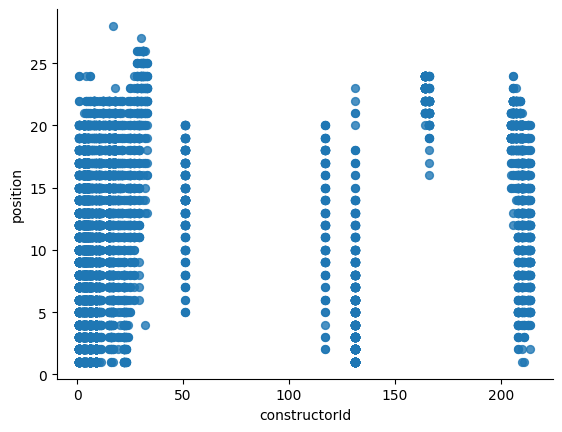

In [30]:
# @title raceId vs driverId

from matplotlib import pyplot as plt
qualifying.plot(kind='scatter', x='constructorId', y='position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

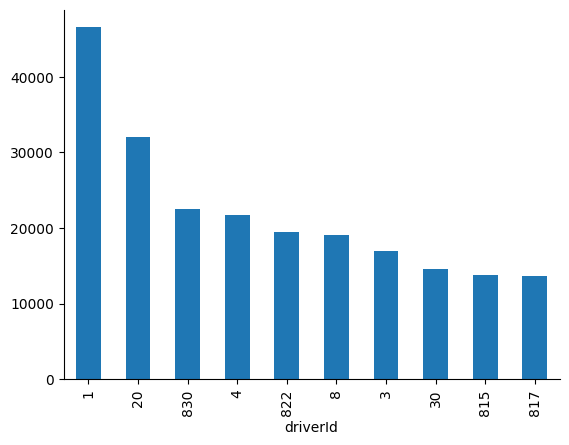

In [43]:
# prompt: plot the top 10 unique driverRef and points from driver_standings dataframe

import matplotlib.pyplot as plt
driver_standings.groupby('driverId')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [61]:
# prompt: join driver_standings and drivers dataframe on driverId

driver_perf = results.merge(drivers, on='driverId')
driver_perf.head().T



,0,1,2,3,4
resultId,1,27,57,69,90
raceId,18,19,20,21,22
driverId,1,1,1,1,1
constructorId,1,1,1,1,1
number_x,22,22,22,22,22
grid,1,9,3,5,3
position,1,5,13,3,2
positionText,1,5,13,3,2
positionOrder,1,5,13,3,2
points,10.0,4.0,0.0,6.0,8.0


<Axes: xlabel='driverRef'>

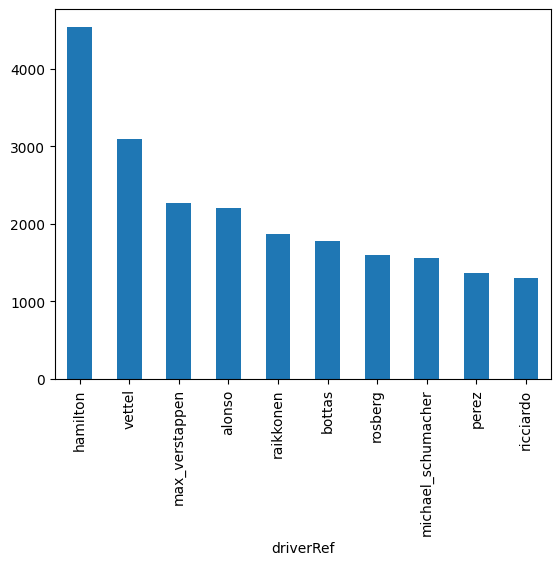

In [62]:
driver_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')


In [63]:
driver_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10)


driverRef
hamilton              4540.5
vettel                3098.0
max_verstappen        2275.5
alonso                2203.0
raikkonen             1873.0
bottas                1783.0
rosberg               1594.5
michael_schumacher    1566.0
perez                 1361.0
ricciardo             1307.0
Name: points, dtype: float64

In [52]:
# prompt: find the max number of points from max_verstappen

max_verstappen_points = driver_perf[driver_perf['driverRef'] == 'max_verstappen']['points'].max()
print(max_verstappen_points)


454.0


# Clean Data

Identify null values, find duplicates, find any outliers

# Analyze